In [1]:
import pandas as pd
import numpy as np

data = ".\\DATA\\train.csv"
test = ".\\DATA\\test.csv"

data = pd.read_csv(data)
test = pd.read_csv(test)

data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [2]:
test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [3]:
data.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [4]:
data.rename(columns = {'Air temperature [K]': "Air temperature"}, inplace = True)
data.rename(columns = {'Process temperature [K]': 'Process temperature'}, inplace = True)
data.rename(columns = {'Rotational speed [rpm]': 'Rotational speed'}, inplace = True)
data.rename(columns = {'Torque [Nm]': 'Torque'}, inplace = True)
data.rename(columns = {'Tool wear [min]': 'Tool wear'}, inplace = True)


test.rename(columns = {'Air temperature [K]': "Air temperature"}, inplace = True)
test.rename(columns = {'Process temperature [K]': 'Process temperature'}, inplace = True)
test.rename(columns = {'Rotational speed [rpm]': 'Rotational speed'}, inplace = True)
test.rename(columns = {'Torque [Nm]': 'Torque'}, inplace = True)
test.rename(columns = {'Tool wear [min]': 'Tool wear'}, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   136429 non-null  int64  
 1   Product ID           136429 non-null  object 
 2   Type                 136429 non-null  object 
 3   Air temperature      136429 non-null  float64
 4   Process temperature  136429 non-null  float64
 5   Rotational speed     136429 non-null  int64  
 6   Torque               136429 non-null  float64
 7   Tool wear            136429 non-null  int64  
 8   Machine failure      136429 non-null  int64  
 9   TWF                  136429 non-null  int64  
 10  HDF                  136429 non-null  int64  
 11  PWF                  136429 non-null  int64  
 12  OSF                  136429 non-null  int64  
 13  RNF                  136429 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 14.6+ MB


In [6]:
# data optimization

#  removing characters from type byb adding new axes..

data = pd.concat([data, pd.get_dummies(data["Type"], prefix= "Type").astype(int)] , axis = 1)
data.drop("Type", axis = 1, inplace = True)

test = pd.concat([test, pd.get_dummies(test["Type"], prefix= "Type").astype(int)] , axis = 1)
test.drop("Type", axis = 1, inplace = True)

data.head()

,id,Product ID,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,0,L50096,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,1,M20343,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,2,L49454,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,3,L53355,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,4,M24050,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1


In [7]:
# data optimization

# Removing type prefix from product id

data["Product ID"] = [int(i[1:]) for i  in data["Product ID"]]
test["Product ID"] = [int(i[1:]) for  i in test["Product ID"]]

data.head()

,id,Product ID,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,0,50096,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,1,20343,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,2,49454,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,3,53355,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,4,24050,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   136429 non-null  int64  
 1   Product ID           136429 non-null  int64  
 2   Air temperature      136429 non-null  float64
 3   Process temperature  136429 non-null  float64
 4   Rotational speed     136429 non-null  int64  
 5   Torque               136429 non-null  float64
 6   Tool wear            136429 non-null  int64  
 7   Machine failure      136429 non-null  int64  
 8   TWF                  136429 non-null  int64  
 9   HDF                  136429 non-null  int64  
 10  PWF                  136429 non-null  int64  
 11  OSF                  136429 non-null  int64  
 12  RNF                  136429 non-null  int64  
 13  Type_H               136429 non-null  int32  
 14  Type_L               136429 non-null  int32  
 15  Type_M           

53257    139
49056    131
53271    131
54275    120
48892    120
        ... 
24614      1
39399      1
15853      1
32637      1
48036      1
Name: Product ID, Length: 9976, dtype: int64


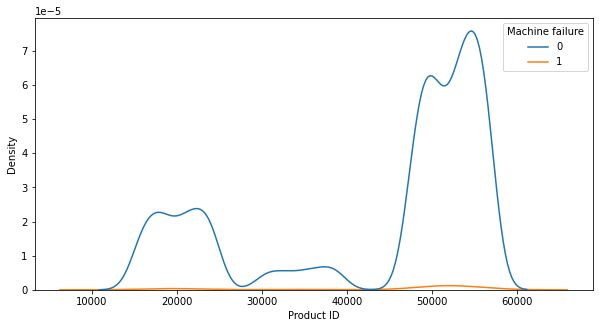

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

print(data["Product ID"].value_counts())

plt.rcParams['figure.figsize'] = (10,5)
sns.kdeplot(data = data, x = "Product ID", hue = "Machine failure")
plt.show()

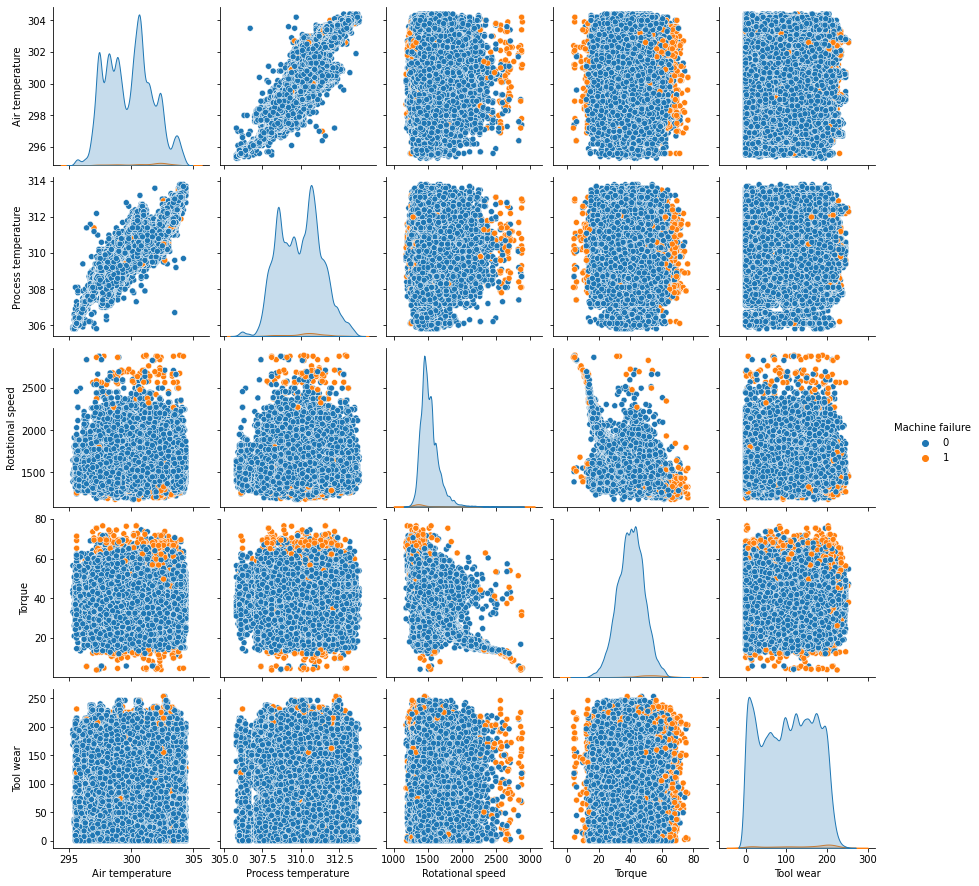

In [10]:
sns.pairplot(data = data.iloc[:, 2:8], hue = "Machine failure")

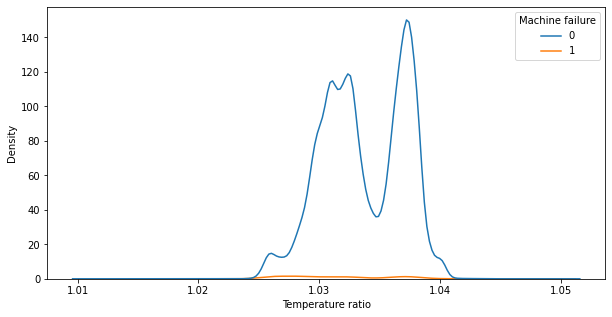

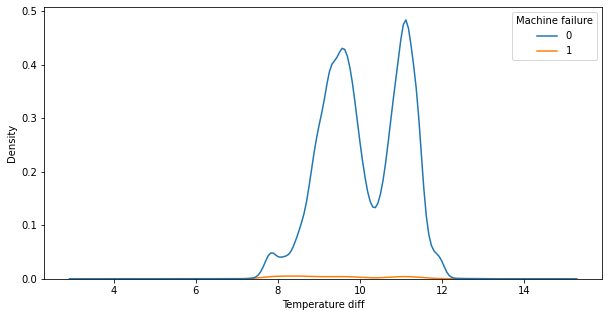

In [11]:
# data optimization

data["Temperature ratio"] = data["Process temperature"] / data["Air temperature"]
test["Temperature ratio"] = test["Process temperature"] / test["Air temperature"]

data["Temperature diff"] = data["Process temperature"] - data["Air temperature"]
test["Temperature diff"] = test["Process temperature"] - test["Air temperature"]

sns.kdeplot(data = data, x = "Temperature ratio", hue = "Machine failure")
plt.show()
sns.kdeplot(data = data, x = "Temperature diff", hue = "Machine failure")
plt.show()

In [12]:
# data optimization

data["dummy"] = [2 * np.pi * i / 60 for i in data["Rotational speed"] ]
data["Power"] = data["Torque"] * data["dummy"]

test["dummy"] = [2 * np.pi * i / 60 for i in test["Rotational speed"] ]
test["Power"] = test["Torque"] * test["dummy"]

data.drop("dummy", axis = 1, inplace = True)
data.head()

,id,Product ID,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M,Temperature ratio,Temperature diff,Power
0,0,50096,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0,1.029940,9.0,6033.491523
1,1,20343,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1,1.031395,9.5,5360.279633
2,2,49454,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0,1.030738,9.2,5009.007687
3,3,53355,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0,1.032890,9.9,7069.965771
4,4,24050,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1,1.036913,11.0,6083.317183


In [13]:
from sklearn.metrics import confusion_matrix

# using confusion matrix to find correlation

print("Type H: \n", confusion_matrix(data["Type_H"], data["Machine failure"]), "\n")
print("Type M: \n", confusion_matrix(data["Type_M"], data["Machine failure"]), "\n")
print("Type L: \n", confusion_matrix(data["Type_L"], data["Machine failure"]))

Type H: 
 [[125474   2032]
 [  8807    116]] 

Type M: 
 [[102566   1711]
 [ 31715    437]] 

Type L: 
 [[40522   553]
 [93759  1595]]


In [14]:
#  local failures

print("TWF: \n", confusion_matrix(data["TWF"], data["Machine failure"]), "\n")
print("HDF: \n", confusion_matrix(data["HDF"], data["Machine failure"]), "\n")
print("PWF: \n", confusion_matrix(data["PWF"], data["Machine failure"]), "\n")
print("OSF: \n", confusion_matrix(data["OSF"], data["Machine failure"]), "\n")
print("RNF: \n", confusion_matrix(data["RNF"], data["Machine failure"]))


TWF: 
 [[134281   1936]
 [     0    212]] 

HDF: 
 [[134275   1450]
 [     6    698]] 

PWF: 
 [[134278   1824]
 [     3    324]] 

OSF: 
 [[134277   1612]
 [     4    536]] 

RNF: 
 [[133979   2142]
 [   302      6]]


In [15]:
# data optimization

#   LF = atleast one failure among 'TWF', 'HDF', 'PWF', 'OSF' and 'RNF'

data["LF"] =  data[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].gt(0).sum(axis = 1)
data["LF"] = [0 if (i == 0) else 1 for i in data["LF"]]

test["LF"] =  test[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].gt(0).sum(axis = 1)
test["LF"] = [0 if (i == 0) else 1 for i in test["LF"]]
 
print(confusion_matrix(data["LF"], data["Machine failure"]))

[[133966    507]
 [   315   1641]]


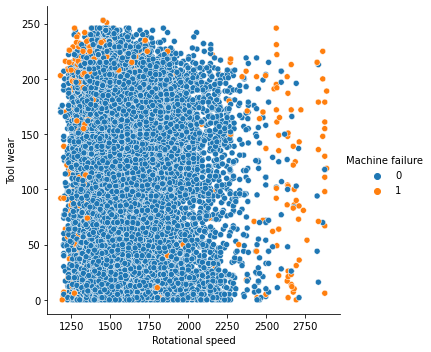

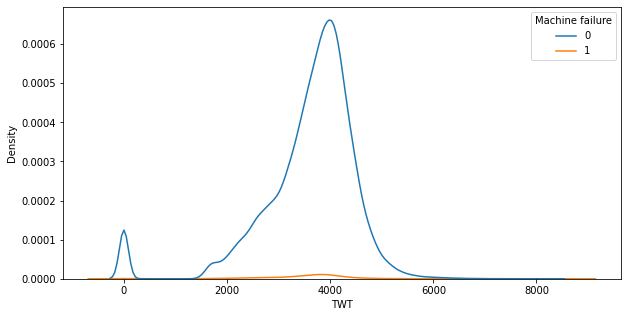

In [16]:
# data optimization

#   finding constant of tool wear theory 
#  V * T ^n = constant   ... n ranges in between 1 and  1.5

sns.relplot(data = data, x = "Rotational speed", y = "Tool wear", hue = "Machine failure")
plt.show()

# data["dummy2"] = data["dummy"] * data["Tool wear [min]"]
# sns.kdeplot(data = data, x = "dummy2", hue = "Machine failure")
# plt.show()

data["TWT"] = data["Rotational speed"] * data["Tool wear"] ** 0.2
test["TWT"] = test["Rotational speed"] * test["Tool wear"] ** 0.2


sns.kdeplot(data = data, x = "TWT", hue = "Machine failure")
plt.show()

In [17]:
data.head()

,id,Product ID,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,...,OSF,RNF,Type_H,Type_L,Type_M,Temperature ratio,Temperature diff,Power,LF,TWT
0,0,50096,300.6,309.6,1596,36.1,140,0,0,0,...,0,0,0,1,0,1.029940,9.0,6033.491523,0,4288.036704
1,1,20343,302.6,312.1,1759,29.1,200,0,0,0,...,0,0,0,0,1,1.031395,9.5,5360.279633,0,5075.418269
2,2,49454,299.3,308.5,1805,26.5,25,0,0,0,...,0,0,0,1,0,1.030738,9.2,5009.007687,0,3436.095359
3,3,53355,301.0,310.9,1524,44.3,197,0,0,0,...,0,0,0,1,0,1.032890,9.9,7069.965771,0,4384.077393
4,4,24050,298.0,309.0,1641,35.4,34,0,0,0,...,0,0,0,0,1,1.036913,11.0,6083.317183,0,3322.036229


In [18]:
print(data.columns, "\n\n")

data.info()

Index(['id', 'Product ID', 'Air temperature', 'Process temperature',
       'Rotational speed', 'Torque', 'Tool wear', 'Machine failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF', 'Type_H', 'Type_L', 'Type_M',
       'Temperature ratio', 'Temperature diff', 'Power', 'LF', 'TWT'],
      dtype='object') 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   136429 non-null  int64  
 1   Product ID           136429 non-null  int64  
 2   Air temperature      136429 non-null  float64
 3   Process temperature  136429 non-null  float64
 4   Rotational speed     136429 non-null  int64  
 5   Torque               136429 non-null  float64
 6   Tool wear            136429 non-null  int64  
 7   Machine failure      136429 non-null  int64  
 8   TWF                  136429 non-null  int64  
 9   HDF              

In [20]:
test_features = ['Product ID', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'TWF',
                'HDF', 'PWF', 'OSF', 'RNF', 'Type_H', 'Type_L', 'Type_M', 'Temperature ratio', 'Temperature diff', 
                'Power', 'LF', 'TWT']

x = data[test_features]

y = data["Machine failure"]

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 5)
x_train.head()

,Product ID,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M,Temperature ratio,Temperature diff,Power,LF,TWT
44163,24143,298.1,308.9,1614,43.6,181,0,0,0,0,0,0,0,1,1.036229,10.8,7369.171056,0,4564.983849
21875,47294,298.8,308.6,1585,33.6,95,0,0,0,0,0,0,1,0,1.032798,9.8,5576.955279,0,3940.705569
22374,54170,300.7,311.1,1606,32.4,68,0,0,0,0,0,0,1,0,1.034586,10.4,5449.029626,0,3734.627781
101018,18710,302.3,311.1,1540,43.0,182,0,0,0,0,0,0,0,1,1.029110,8.8,6934.542184,0,4360.487024
78606,53728,301.5,310.7,1452,44.7,116,0,0,0,0,0,0,1,0,1.030514,9.2,6796.772874,0,3757.147232


In [22]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score


clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))


print(accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred))


[[6728    3]
 [  19   72]]
0.9967751392553503 0.8953815461020928


In [23]:
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_predict

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 4, 18),
        'learning_rate': trial.suggest_float('learning_rate', 0.000001, 0.15, log=True),
        # 'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.3),
        # 'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        # 'n_estimators': trial.suggest_int('n_estimators', 200, 600),
        # 'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 0.5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0001, 1.0),
        'gamma': trial.suggest_float('gamma', 0.00001, 0.1),
        'booster': 'gbtree',
        'objective': 'binary:logistic',
        # 'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
        # 'tree_method': 'gpu_hist',
    }

    model = xgb.XGBClassifier(**params, n_jobs = -1)


    cv = StratifiedKFold(n_splits=5)
    y_pred_proba = cross_val_predict(model, x_train, y_train, cv=cv, method='predict_proba')[:,1]
    auc = roc_auc_score(y_train, y_pred_proba)
    
    return auc


study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials= 10)

best_XGB = study.best_params
print("Best: ", best_XGB)

[I 2023-08-27 19:41:08,558] A new study created in memory with name: no-name-98633512-5b90-4147-9450-85aea59a8133
[I 2023-08-27 19:41:27,856] Trial 0 finished with value: 0.9287113902161582 and parameters: {'max_depth': 9, 'learning_rate': 2.8069108935716132e-05, 'reg_alpha': 0.0030318310022574447, 'reg_lambda': 0.9490082563046112, 'gamma': 0.06639729683262456}. Best is trial 0 with value: 0.9287113902161582.
[I 2023-08-27 19:41:44,516] Trial 1 finished with value: 0.9255300151103203 and parameters: {'max_depth': 8, 'learning_rate': 0.00010934704718108594, 'reg_alpha': 0.28741837808114834, 'reg_lambda': 0.9574344069710679, 'gamma': 0.08431864757821458}. Best is trial 0 with value: 0.9287113902161582.
[I 2023-08-27 19:41:59,432] Trial 2 finished with value: 0.9336517331321927 and parameters: {'max_depth': 6, 'learning_rate': 0.000744911398497281, 'reg_alpha': 0.43362605999815446, 'reg_lambda': 0.11533709698848135, 'gamma': 0.08274403312840856}. Best is trial 2 with value: 0.933651733132

Best:  {'max_depth': 13, 'learning_rate': 0.08522408723814512, 'reg_alpha': 0.1533269116688775, 'reg_lambda': 0.8744836778029229, 'gamma': 0.013032463492292957}


In [24]:
import xgboost as xgb

clf = xgb.XGBClassifier(objective="binary:logistic", random_state=42, **best_XGB)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))


print(accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

[[6728    3]
 [  18   73]]
0.9969217238346526 0.9008760515965983


In [27]:
import xgboost as xgb

clf = xgb.XGBClassifier(objective="binary:logistic", random_state=42, **best_XGB)
clf.fit(x, y)
y_pred = clf.predict(test[test_features])

answer = pd.DataFrame(test.id)

answer['Machine failure'] = y_pred
print(answer.info())

answer.to_csv(".\\DATA\\solution.csv", index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               90954 non-null  int64
 1   Machine failure  90954 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 1.0 MB
None
